# 회귀분석

## 0. 라이브러리 및 데이터 로딩

In [1]:
# 필요 라이브러리 로딩
import numpy as np
import pandas as pd # 데이터프레임
import matplotlib.pyplot as plt # 시각화 툴
import seaborn as sns # 시각화 툴

from scipy import stats
import statsmodels.api as sm # 회귀분석 # 쉬운 summary table을 제공하므로 scipy 제공 회귀분석 모델 대신 사용

In [2]:
# 데이터셋 로딩
# 보스턴 집값 데이터 로딩
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# 데이터와 타겟 분리
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # 특성 데이터
target = raw_df.values[1::2, 2]  # 타겟 데이터 (주택 가격)

# 특성 이름 정의
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
    "PTRATIO", "B", "LSTAT"
]

# 데이터프레임 생성
boston_df = pd.DataFrame(data, columns=columns)
boston_df['MEDV'] = target  # 타겟 데이터를 데이터프레임에 추가

# 데이터프레임 확인
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. 단순 회귀
- 주택 가격(중앙값)을 하위 소득 계층 비율로 설명하려고 하는 단순 회귀식이다$


$$
\text{MEDV} = \beta_0 + \beta_1 \cdot \text{LSTAT} + \epsilon
$$

- 종속변수 : `MEDV`

- 독립변수 : `LSTAT`

### 1-1. 산점도로 변수 간 관계 파악

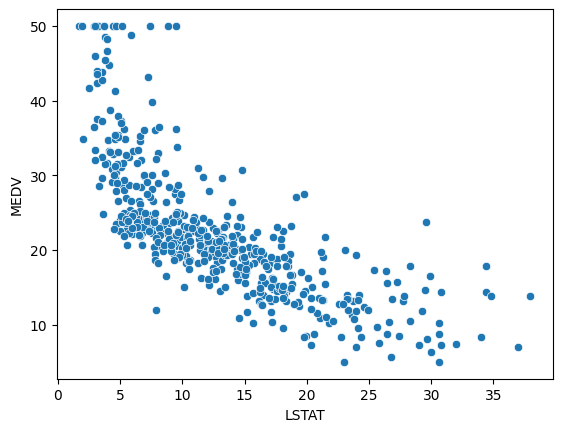

In [3]:
# 두 변수 간 관계 파악을 위해 산점도
sns.scatterplot(x=boston_df['LSTAT'], y=boston_df['MEDV'])
plt.show()

- `LSTAT`는 종속변수 `MEDV`와 비선형 패턴이 있음을 확인할 수 있다.
- 하지만 우선은 단순회귀(1차식)으로 설명해보자. 

In [4]:
# stats 모델을 사용하기 위해서 MEDV value와 LSTAT value를 numpy의 array로 한번 빼와보겠다. 
# pandas dataframe에 대해서 indexing을 한 series가 되겠고, 그 series에 대한 value를 뽑는다. 
MEDV = boston_df['MEDV'].values
LSTAT = boston_df['LSTAT'].values

In [5]:
# 확인해보면 아래와 같이 array로 나타난 것을 확인 가능하다. 
MEDV

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### 1-2. 독립변수에 상수항 결합
- 회귀모형 수식을 간단하게 만들기 위해 상수항을 독립변수에 추가해주어야 함
- 상수항이 결합이 된다면, 원소가 1인 데이터가 추가가 됨
- 상수항이 결합되어야 가중치(beta_0)가 행렬곱으로 들어왔을 때, 살아남을 수 있음. --> 수식이 매우 간단해짐
- 일반적으로 선형회귀는 늘 상수항 결합을 함

In [6]:
LSTAT = sm.add_constant(LSTAT) # constant 상수항 --> add 추가!

In [7]:
LSTAT

array([[1.  , 4.98],
       [1.  , 9.14],
       [1.  , 4.03],
       ...,
       [1.  , 5.64],
       [1.  , 6.48],
       [1.  , 7.88]])

- 상수항을 추가해서 1이라는 상수가 각 케이스별로 생긴다.
- 뒤에 있는 값들이 아래에서 베타 1,에 해당한다. LSTAT에 직접적으로 연결되어 있는 값(정확하게 말하면 LSTAT의 값이라고 한다)

$$
\text{MEDV} = \beta_0 + \beta_1 \cdot \text{LSTAT} + \epsilon
$$

`상수항의 역할`

선형 회귀 모델은 종속 변수 \(Y\)가 독립 변수 \(X\)와 선형 관계를 가진다고 가정합니다. 여기서 beta_0는 **절편(intercept)**입니다. 이 절편은 **모든 독립 변수가 0일 때, 종속 변수 \( Y \)의 예상값**을 나타냅니다.

`상수항을 1로 설정하는 이유`

`sm.add_constant(LSTAT)`에서 상수항을 추가할 때, **모든 행에 대해 1로 채워진 열**을 추가합니다. 이 열이 바로 절편을 추정할 수 있게 해줍니다.

수학적으로, **독립 변수 행렬 \( X \)**에 상수항을 추가하지 않으면 절편이 포함되지 않은 형태로 회귀분석이 이루어지며, 모델이 원점을 반드시 지나야 합니다. 즉, **절편 \( \beta_0 \)가 0으로 가정**된다는 의미입니다. 이렇게 되면 모델의 유연성이 줄어들어 실제 데이터와 잘 맞지 않을 수 있습니다.

`왜 꼭 1이어야 하는가?`

상수항을 1로 설정하면, 회귀 분석에서 **절편 \( \beta_0 \)의 값을 따로 추정**할 수 있게 됩니다. 회귀 모형은 이 상수항과 나머지 독립 변수들과의 관계를 기반으로 절편을 추정합니다.

만약 상수항을 포함하지 않으면, 회귀 모델은 절편이 0이라고 가정하고, **실제 데이터가 원점을 지나지 않을 경우 모델이 부정확**해질 수 있습니다.

따라서, **상수항을 1로 설정**하는 것은 절편을 포함하여 데이터와의 관계를 보다 정확하게 모델링하기 위한 중요한 방법입니다.
|

### 1-3. 단순 선형 회귀 분석
- 우선은 linear 모델을 만들 것이다. statsmodels이 제공하는 OLS를 이용할 것이다. 

In [8]:
# statsmodels의 OLS를 이용하여 종속변수, 독립변수를 인수로 추가
linear_mod = sm.OLS(MEDV, LSTAT) 
linear_result = linear_mod.fit() # linear_mod의 결과 확인을 위해 fit 메서드를 활용

In [9]:
linear_mod # 인스턴스가 생성된 것을 확인

In [10]:
linear_result # 다양한 정보를 포함하고 있다. .을 찍으면 여러 기능 활용 가능

In [11]:
print(linear_result.summary()) # 그중에 summary 기능

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        16:45:47   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

- Dep. Variable : 종속변수
- Model : 어떤 모델? OLS!
- Method : 최소제곱법
- R-squared: 0.544 --> 중요한 정보! 결정계수에 대한 부분은 필히 확인해야 함
- F-statistic: 601.6 --> 모델이 얼마나, 어떤 설명력을 갖고 있는지 확

- x1: LSTAT라고 생각하자.
- t검정을 했을 때, -24.528(절댓값이 24.5정도 값이 나옴)
- p-value는 0에 가깝다. --> 귀무가설을 기각하고 대립가설을 채택(= 종속변수에 영향을 준다!)

In [12]:
np.sqrt(linear_result.fvalue)

24.52789985118774

- linear_result.fvalue는 모델의 F-통계량을 나타내며, 이 값을 np.sqrt를 사용하여 제곱근을 계산한 것입니다.
- 제곱근을 계산하는 이유는 F-통계량이 분산 분석에서 사용되는 값이며, 이 값을 선형 회귀나 통계 분석에서 특정 해석을 위해 변환할 수 있습니다.

In [13]:
# 좀 더 이쁘게 요약을 할 수는 없나?
# R 스타일로 리그레션을 하고 싶다면 from_formula를 이용할 수 있음
linear_mod = sm.OLS.from_formula('MEDV ~ LSTAT', data=boston_df)
# 인수 : '종속변수 - 독립변수1 + 독립변수2 + ... + 독립변수 N', data=데이터이름
linear_result = linear_mod.fit()

In [14]:
print(linear_result.summary()) # 좀 더 직관적으로 빠르게 할 수 있다. 

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        16:45:47   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

- 동일 종속변수와 독립변수에 대해 `sm.OLS`와 `sm.OLS.from_formula`를 이용한 회귀 분석 결과값은 동일하다

### 1-4. 잔차 확인

<Axes: ylabel='Count'>

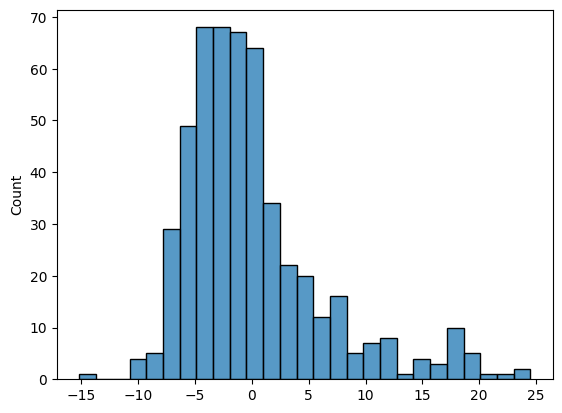

In [15]:
# 잔차의 분포 확인
sns.histplot(linear_result.resid)

- 잔차를 확인해보면 nomal-distribution을 따르지 않는다.
- 이 부분은 향후 개선되는 모습을 보여줄 것이다.
- 만약 정규분포를 따르지 않아 가정이 맞춰지지 않는다면 앞서 리그레션 결과의 인과성을 일반화시키기는 힘들다. 

### 1-5. 선형화를 통한 회귀분석

### 1-5-1. 상관관계 및 분포 확인

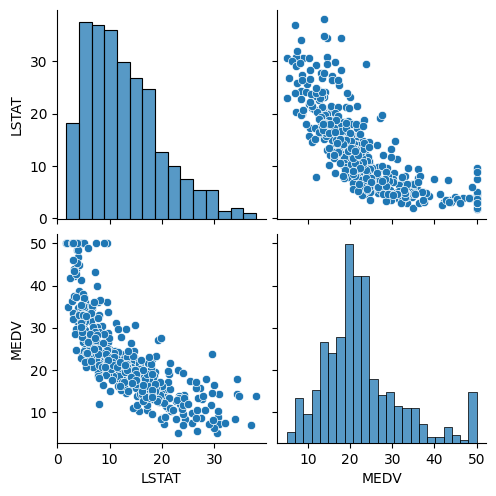

In [16]:
# 하위 계층 비율과 집 거래 중앙값 관계 확인
sns.pairplot(boston_df[['LSTAT', 'MEDV']])
plt.show()

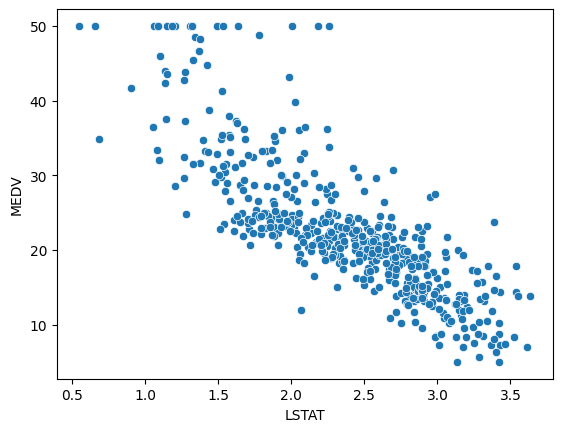

In [17]:
# LSTAT의 log 변환
# LSTAT의 로그 변환
log_LSTAT = np.log(boston_df['LSTAT'])

# 산점도를 그립니다.
sns.scatterplot(x=log_LSTAT, y=boston_df['MEDV'])

# 플롯을 표시합니다.
plt.show()

- 아직 문제가 많지만, 전보다는 훨씬 선형적으로 나타남을 확인 가능
- 만약 맨 위에, 직선으로 나타나는 (집값이 매우 비싼) 부분에 대해서 제거하고 분석했다면 매우 선형적으로 나왔을 것이다.
- 지난번에는 정규타석 등을 통해 제거를 했지만, 이번은 있는 사실이며 정규타석과 같은 제약을 알기 쉽지 않기 때문에 쉽게 함부로 제거하거나 필터링할 수는 없다. 

### 1-5-2. 회귀 분석

In [19]:
# 로그 변환 후 회귀분석 진행
log_linear_mod = sm.OLS.from_formula('MEDV ~ np.log(LSTAT)', data=boston_df)
log_linear_result = log_linear_mod.fit()

In [20]:
# summary table 출력
print(log_linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          9.28e-122
Time:                        17:01:24   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004

- 가장 먼저 R-squared(결정계수)를 보자. 0.665. (이전보다 0.1 정도 설명력이 올라갔다.)
- 로그 변환을 통해 설명력이 개선되었다고 할 수 있다.
- 로그 변환으로 가장 눈에 보여야 할 결과는, 아까의 경우는

$$
\text{MEDV} = \beta_0 + \beta_1 \cdot \text{log(LSTAT)} + \epsilon
$$

- LSTAT이 증가했을 때, beta_1은 np.log(LSTAT) = -12.4810 --> 약 12.5%
- LSTAT이 1 증가했을 때, MEDV의 값은 12.5%씩 떨어진다. 이런 식으로 해석할 수 있다.
- 독립변수가 LOG일 경우에는 %로, 일반 로그변환이 안된 채라면 BETA 값 자체로 설명할 수 있다. 

### 1-5-3. 잔차 확인

<Axes: ylabel='Count'>

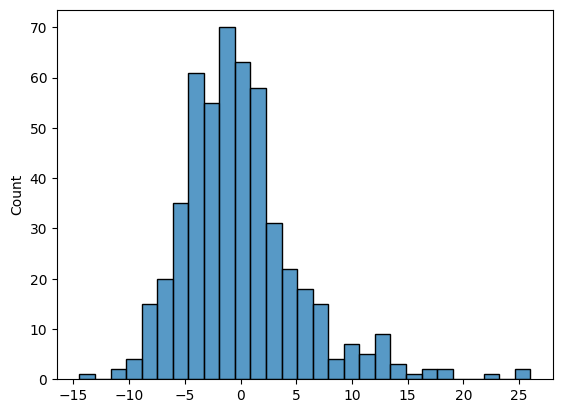

In [21]:
sns.histplot(log_linear_result.resid)

- 이전보다는 개선이 된 모습을 볼 수 있다.
- 그렇지만 아직까지도 정규성을 만족하려면 끝단의 값들이 어떤 식으로든 처리가 되어야할 것 같다. 

## 2. 2차 회귀 분석(Quadratic Regression Model)

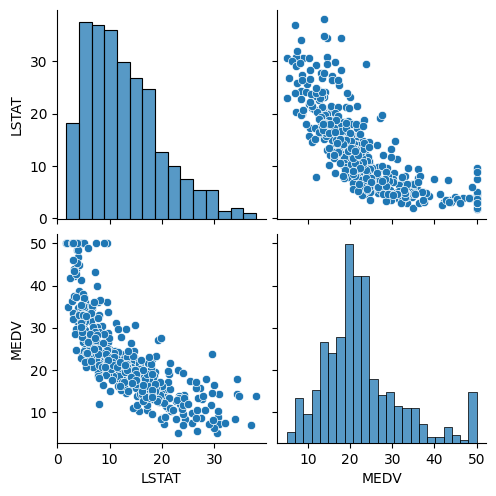

In [22]:
sns.pairplot(boston_df[['LSTAT', 'MEDV']])
plt.show()

- 두 변수 간 커브 모양의 관계가 형성되어 있는 것을 확인할 수 있습니다.
- 이를 고려하기 위해 `LSTAT` 변수의 2차항을 추가해보자. 

In [26]:
# 2차 회귀 분석 모델 설정
quadratic_mod = sm.OLS.from_formula('MEDV ~ LSTAT + I(LSTAT ** 2)', data=boston_df) # LSTAT의 제곱값 추가
quadratic_result = quadratic_mod.fit()

 - I 는 interaction을 뜻한다. 

In [27]:
# 결과 테이블 출력
print(quadratic_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          1.56e-112
Time:                        17:49:02   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

- 이번에는 변수가 두 개 들어온 것을 확인할 수 있다.
- LSTAT과 LSTAT 제곱이다.
- 결정계수를 보니 0.641로, 이전 로그 모델이 조금 더 잘 설명할 수 있다는 것을 나타낸다. 

### 2-1. 잔차 확인

<Axes: ylabel='Count'>

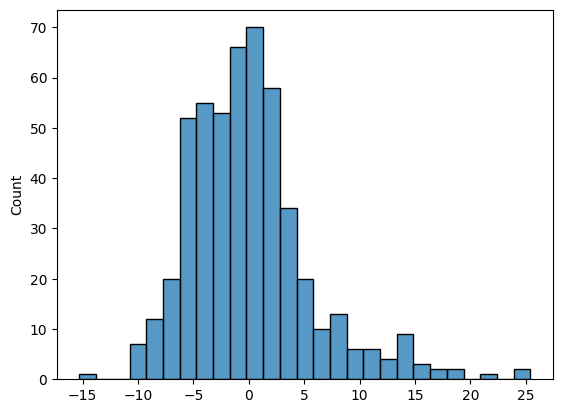

In [28]:
sns.histplot(quadratic_result.resid)

- 어느 정도 맨 첫번째 단순회귀보다는 정규성의 모양을 갖추고 있다. 그러나 아직까지도 멀었다. 

### 2-2. 3개 모델 결과 비교 (선형 VS 로그-리니어 VS 2차 회귀)

In [29]:
print('R squared of linear model --> ', np.round(linear_result.rsquared, 2))
print('R squared of log-linear model --> ', np.round(log_linear_result.rsquared, 2))
print('R squared of quadratic model --> ', np.round(quadratic_result.rsquared, 2))

R squared of linear model -->  0.54
R squared of log-linear model -->  0.66
R squared of quadratic model -->  0.64


## 3. 다중 회귀 (Multiple Regression)
- 방 갯수를 알려주는 `RM` 변수 추가하여 분석을 진행

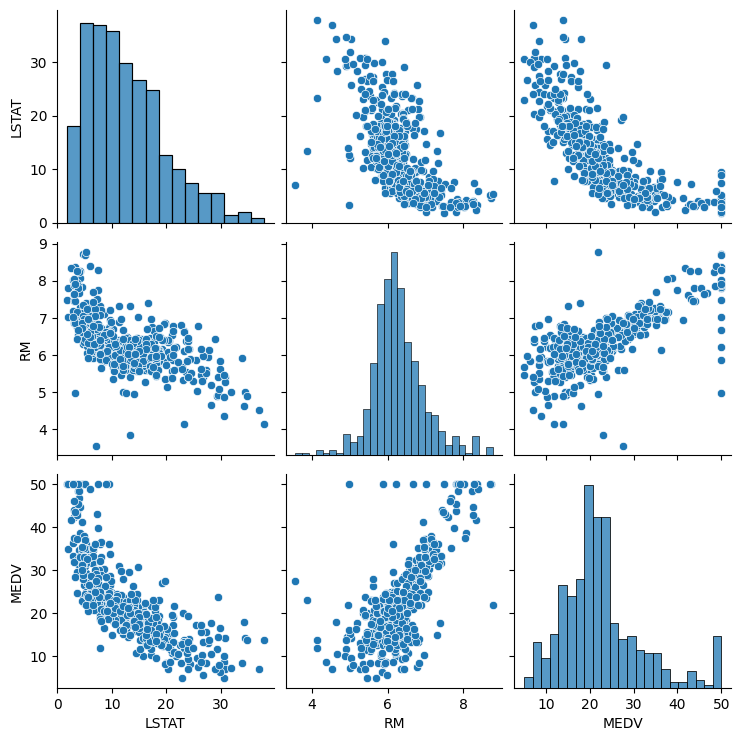

In [30]:
sns.pairplot(boston_df[['LSTAT', 'RM', 'MEDV']])
plt.show()

- RM과의 관계를 보면, 물론 옆단에는 조금 평행된 값들이 있지만, 대부분 선형적으로 관계가 이루어져있을 것 같다. 

In [31]:
# RM 변수 추가시 두 가지 옵션, 이미 평균값이기에 수치형으로도 볼 수 있음. 그래고 꽤 선형성을 나타냄
# 하지만 엄밀히 말하면 범주형 변수임, 한 개 두 개 세개 내게.... 2.5개와 같은 실수를 취할 수 없음
# 이럴 때 binning처리 가능, 여기선 하지 않음

multi_model = sm.OLS.from_formula('MEDV ~ RM + LSTAT * I(LSTAT ** 2)', data=boston_df)
multi_result = multi_model.fit()

In [33]:
print(multi_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     299.2
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          2.94e-131
Time:                        17:59:54   Log-Likelihood:                -1531.4
No. Observations:                 506   AIC:                             3073.
Df Residuals:                     501   BIC:                             3094.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.8301    

- 결정계수를 보면, 설명력이 0.705로 더 높아졌다.
- 또한 F 검정통계량도 의미하는 바가 크기 때문에 같이 참조해주면 좋다. 


### 3-1. 잔차 확인

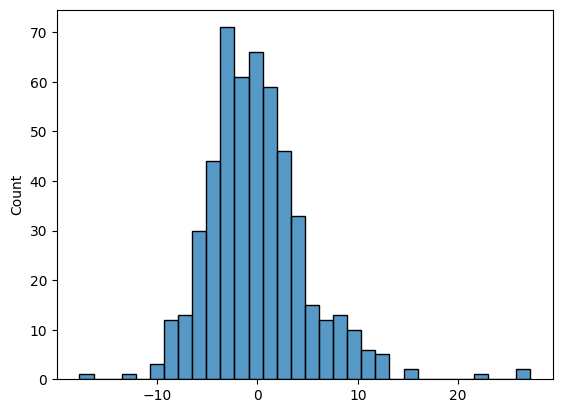

In [37]:
sns.histplot(multi_result.resid)
plt.show()

- 대체로 종 모양이지만, 아직도 정규성으로 보기에는 부족한 것 같다. 

### 3-2. 로그항 추가(2차항 제거)
- 이번에는 2차항을 제거하고 로그항을 추가해보겠다. LSTAT의 이차항을 제거하고 로그변환을 해서 만들어보자.

In [38]:
multi_mod2 = sm.OLS.from_formula('MEDV ~ RM + np.log(LSTAT)', data=boston_df)
multi_result2 = multi_mod2.fit()

In [40]:
print(multi_result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     607.2
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          7.40e-135
Time:                        19:21:08   Log-Likelihood:                -1529.6
No. Observations:                 506   AIC:                             3065.
Df Residuals:                     503   BIC:                             3078.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.8865      3.552      6.443

- 결정계수를 보면 조금 더 개선된 것을 볼 수 있다.
- 그리고 여러 개의 변수가 들어갔을 때에는 Adj. R-squared라고 조정된 R스퀘어 값을 봐야하는데,
- 변수가 추가될 때마다 결정계수가 올라가는 경향이 있기 때문에 다중회귀에서는 좀 확인을 하는 게 좋다. (0.707에서 0.706으로 떨어진 걸 보면 거의 패널티를 부과받지 않았다)

### 3-3. 잔차 확인

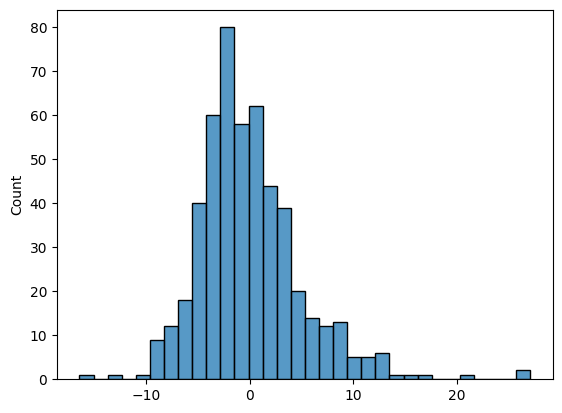

In [41]:
sns.histplot(multi_result2.resid)
plt.show()

- 조금은 더 정규분포에 가까워진 모습을 확인할 수 있다.
  

### 3-4. 성능 확인
- 마지막으로 성능 확인을 해보자. 

In [44]:
print('R squared of Multiple Regression model (2차항 포함) --> {:.3f}'.format(multi_result.rsquared)) # 이렇게 쉽게 표현도 가능
print('R squared of Multiple Regression model (로그 변환항 포함) --> ', np.round(multi_result2.rsquared, 2))

R squared of Multiple Regression model (2차항 포함) --> 0.705
R squared of Multiple Regression model (로그 변환항 포함) -->  0.71
